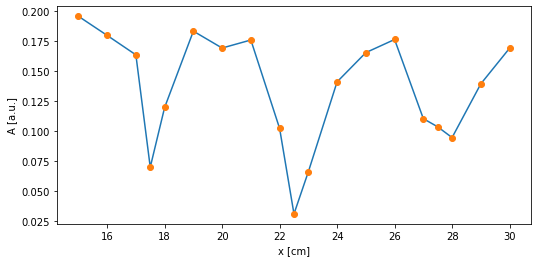

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob

Lambda = 10
k = 2*np.pi/Lambda
L = 40

flist = glob.glob('./interference/3430/*.csv')
flist.sort()
x = []
y = []
for f in flist:
    data = pd.read_csv(f)
    indx = len(f) - f[::-1].index('/')
    y.append(np.std(data['Recording (a.u.)']))
    x.append(float(f[indx:indx+4]))

plt.figure(figsize=(8.5,4))
plt.plot(x, y, '-')
plt.plot(x, y, 'o')
plt.xlabel('x [cm]')
plt.ylabel('A [a.u.]')
plt.savefig('waves-interference.png')
plt.show()

In [225]:
def model(x, A, B, k, L):
    return np.fabs(A*np.cos(k*x)+A*np.cos(k*(x-L)))+B
    
A = .075
B = .005
minima = [L/2 + (2*n+1)*Lambda/4 for n in range(-5,5,1)]
print('minima expected for x in {}'.format(minima))
p0 = [A, B, k, L]
p = p0
yerr = [0.002]*len(y)
p, cov = curve_fit(model, x, y, sigma = yerr, p0 = p0)

print(p)
print('k = {}'.format(p[2]))
print('lambda = {} +- {} cm'.format(2*np.pi/p[2], 2*np.pi/p[2]**2*np.sqrt(cov[2][2])))
print('L      = {} +- {} cm'.format(p[3], np.sqrt(cov[3][3])))

minima expected for x in [-2.5, 2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5]
[ 0.05925878  0.06680235  0.62056446 40.3002189 ]
k = 0.620564459465447
lambda = 10.124951906836413 +- 0.25503192761825 cm
L      = 40.300218900512014 +- 0.2490505614409285 cm


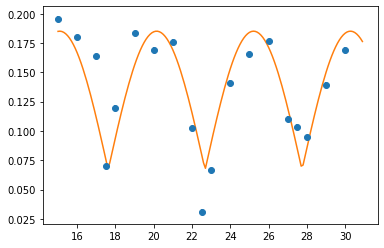

In [219]:
plt.errorbar(x, y, yerr, fmt='o')
xr = np.arange(15, 31, .10)
plt.plot(xr, model(xr, p[0], p[1], p[2], p[3]), '-')
plt.show()